<a href="https://colab.research.google.com/github/edmanft/Drug_Synergy/blob/main/Drug_pair_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating DataFrames for good and badly predicted drugs

We are going to check for differences in drug pairs that are highly predictable or that are not.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats

We import our dataset and the DatFrame with the Pearson score of the drug pairs. drug_comb_commutative has the training set commutative but not the test set. 

In [2]:
path = "/content/drive/MyDrive/archivos_tfm/drug_comb_commutative.csv"

df_drug_comb = pd.read_csv(path, index_col = 0)

In [3]:
df_drug_comb.columns

Index(['Cell line name', 'Compound A', 'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 'H A', 'Einf A', 'IC50 B', 'H B', 'Einf B',
       'Synergy score', 'QA', 'Combination ID', 'Challenge', 'Dataset'],
      dtype='object')

In [4]:
drug_pair_pc = pd.read_csv("/content/drive/MyDrive/archivos_tfm/Drug_comb_Pearson_test_set_lb.csv", index_col = 0)

In [5]:
drug_pair_pc

,Combination ID,n_cl,Pearson coefficient
75,PIK3C.TNFSF10,5,0.989832
131,IAP.IGFR_4,5,0.958138
91,ATR_4.HDAC_4,5,0.918519
6,ERBB.PIK3CA_4,10,0.901655
11,FGFR.WNT,5,0.888264
...,...,...,...
161,Cisplatin.PARP1,5,-0.518792
127,MAP2K_1.PTK2,5,-0.522854
157,Cisplatin.PIK3C,5,-0.652726
66,HSP90.MAP2K_1,7,-0.705411


In [6]:
good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= 0.5]
good_drugs

,Combination ID,n_cl,Pearson coefficient
75,PIK3C.TNFSF10,5,0.989832
131,IAP.IGFR_4,5,0.958138
91,ATR_4.HDAC_4,5,0.918519
6,ERBB.PIK3CA_4,10,0.901655
11,FGFR.WNT,5,0.888264
101,ATM.Gemcitabine,5,0.886713
15,ERBB.Gemcitabine,5,0.873768
48,PIK3C_2.PIK3CA_4,11,0.866581
39,ALK_2.MTOR_1,10,0.837335
25,ESR1_1.MTOR_1,8,0.807843


In [7]:
bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= 0]
bad_drugs

,Combination ID,n_cl,Pearson coefficient
121,IGFR_3.TKI,5,-0.007218
112,EGFR.FGFR,9,-0.020846
108,ALK.CSNK2A1_2,9,-0.024204
31,ESR1.MTOR_1,11,-0.028845
74,ATR_4.BCL2_BCL2L1,15,-0.029755
96,ERBB.FGFR,18,-0.049443
100,MAP2K_3.PIK3C,9,-0.052614
23,FASN.MTOR_1,11,-0.067047
128,JAK.MTOR,5,-0.084840
95,PARP1.PIK3C,16,-0.097514


Now we want to create DataFrames of monotherapy information of the drugs that yield synergy to later check the p values of each feature and see if the null hypothesis is true.

In [8]:
dataset_size = df_drug_comb.shape[0]
complete_list = np.arange(dataset_size, dtype = int)
mask_train = df_drug_comb["Dataset"]=="train"

test_idx = complete_list[~mask_train]

test_df = df_drug_comb.iloc[test_idx]


In [9]:
test_df

,Cell line name,Compound A,Compound B,Max. conc. A,Max. conc. B,IC50 A,H A,Einf A,IC50 B,H B,Einf B,Synergy score,QA,Combination ID,Challenge,Dataset
2199,BT-549,AKT,ADAM17,1.00,75.0,0.184408,1.737511,59.575233,1.0000,0.000000,100.000000,7.398240,1,ADAM17.AKT,ch1,LB
2200,CAL-148,AKT,ADAM17,1.00,75.0,0.153391,1.754123,1.100779,1.0000,0.000000,100.000000,12.686340,1,ADAM17.AKT,ch1,LB
2201,HCC38,AKT,ADAM17,1.00,75.0,1.000000,10.000000,64.400080,1.0000,0.000000,100.000000,-4.351590,1,ADAM17.AKT,ch1,LB
2202,BT-20,BCL2_BCL2L1,ADAM17,1.00,75.0,1.000000,1.161731,39.164587,75.0000,0.965792,70.915033,-1.297886,1,ADAM17.BCL2_BCL2L1,ch1,LB
2203,HCC1143,BCL2_BCL2L1,ADAM17,1.00,75.0,0.115309,10.000000,57.198795,0.0075,0.100000,80.128089,3.369319,1,ADAM17.BCL2_BCL2L1,ch1,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,Calu-6,Vinorelbine,BCL2_2,0.03,3.0,0.015602,2.583210,36.854102,1.0000,0.000000,100.000000,12.384880,1,BCL2_2.Vinorelbine,ch1,test
3875,NCI-H1563,Vinorelbine,BCL2_2,0.03,3.0,0.030000,0.110001,29.776107,0.0003,0.100000,88.601043,-115.750900,1,BCL2_2.Vinorelbine,ch1,test
3876,NCI-H2085,Vinorelbine,BCL2_2,3.00,3.0,0.003088,0.241204,28.470279,1.0000,0.000000,100.000000,-8.649973,1,BCL2_2.Vinorelbine,ch1,test
3877,NCI-H23,Vinorelbine,BCL2_2,0.10,3.0,0.030085,10.000000,15.199403,1.0000,0.000000,100.000000,31.952940,1,BCL2_2.Vinorelbine,ch1,test


In [10]:
valid_xs_perm = pd.DataFrame()
valid_xs_perm[['Cell line name', 'Compound A', 
               'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 
       'H A', 'Einf A', 
       'IC50 B', 'H B', 'Einf B',
       'Synergy score', 'QA', 
       'Combination ID', 'Challenge', 'Dataset']] = test_df[['Cell line name', 'Compound B', 
               'Compound A', 'Max. conc. B',
       'Max. conc. A', 'IC50 B', 
       'H B', 'Einf B', 
       'IC50 A', 'H A', 'Einf A','Synergy score', 'QA', 
       'Combination ID', 'Challenge', 'Dataset']]

      

In [11]:
commutative_df = pd.concat([test_df, valid_xs_perm])
commutative_df

,Cell line name,Compound A,Compound B,Max. conc. A,Max. conc. B,IC50 A,H A,Einf A,IC50 B,H B,Einf B,Synergy score,QA,Combination ID,Challenge,Dataset
2199,BT-549,AKT,ADAM17,1.0,75.00,0.184408,1.737511,59.575233,1.000000,0.000000,100.000000,7.398240,1,ADAM17.AKT,ch1,LB
2200,CAL-148,AKT,ADAM17,1.0,75.00,0.153391,1.754123,1.100779,1.000000,0.000000,100.000000,12.686340,1,ADAM17.AKT,ch1,LB
2201,HCC38,AKT,ADAM17,1.0,75.00,1.000000,10.000000,64.400080,1.000000,0.000000,100.000000,-4.351590,1,ADAM17.AKT,ch1,LB
2202,BT-20,BCL2_BCL2L1,ADAM17,1.0,75.00,1.000000,1.161731,39.164587,75.000000,0.965792,70.915033,-1.297886,1,ADAM17.BCL2_BCL2L1,ch1,LB
2203,HCC1143,BCL2_BCL2L1,ADAM17,1.0,75.00,0.115309,10.000000,57.198795,0.007500,0.100000,80.128089,3.369319,1,ADAM17.BCL2_BCL2L1,ch1,LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,Calu-6,BCL2_2,Vinorelbine,3.0,0.03,1.000000,0.000000,100.000000,0.015602,2.583210,36.854102,12.384880,1,BCL2_2.Vinorelbine,ch1,test
3875,NCI-H1563,BCL2_2,Vinorelbine,3.0,0.03,0.000300,0.100000,88.601043,0.030000,0.110001,29.776107,-115.750900,1,BCL2_2.Vinorelbine,ch1,test
3876,NCI-H2085,BCL2_2,Vinorelbine,3.0,3.00,1.000000,0.000000,100.000000,0.003088,0.241204,28.470279,-8.649973,1,BCL2_2.Vinorelbine,ch1,test
3877,NCI-H23,BCL2_2,Vinorelbine,3.0,0.10,1.000000,0.000000,100.000000,0.030085,10.000000,15.199403,31.952940,1,BCL2_2.Vinorelbine,ch1,test


Now we have our commutative test set which has account for the fact that the drug pair AB is the same as BA. Now we only have to check for the p values of the features of drug A for example. mono_df is conmutative

In [12]:
mono_df = commutative_df[['Max. conc. A','IC50 A', 'H A', 'Einf A','Combination ID']]
mono_df


,Max. conc. A,IC50 A,H A,Einf A,Combination ID
2199,1.0,0.184408,1.737511,59.575233,ADAM17.AKT
2200,1.0,0.153391,1.754123,1.100779,ADAM17.AKT
2201,1.0,1.000000,10.000000,64.400080,ADAM17.AKT
2202,1.0,1.000000,1.161731,39.164587,ADAM17.BCL2_BCL2L1
2203,1.0,0.115309,10.000000,57.198795,ADAM17.BCL2_BCL2L1
...,...,...,...,...,...
3874,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3875,3.0,0.000300,0.100000,88.601043,BCL2_2.Vinorelbine
3876,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3877,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine


In [13]:
good_drugs_mono = mono_df[mono_df["Combination ID"].isin(good_drugs["Combination ID"])]
good_drugs_mono

,Max. conc. A,IC50 A,H A,Einf A,Combination ID
2210,1.0,0.264716,10.000000,91.899118,ADAM17.MAP2K_1
2211,1.0,1.000000,0.000000,100.000000,ADAM17.MAP2K_1
2212,1.0,0.389677,0.393738,27.511524,ADAM17.MAP2K_1
2251,1.0,0.323371,1.107121,34.431833,AKT_1.PIK3C
2252,1.0,0.839257,0.739553,0.000000,AKT_1.PIK3C
...,...,...,...,...,...
3874,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3875,3.0,0.000300,0.100000,88.601043,BCL2_2.Vinorelbine
3876,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine
3877,3.0,1.000000,0.000000,100.000000,BCL2_2.Vinorelbine


In [14]:
bad_drugs_mono = mono_df[mono_df["Combination ID"].isin(bad_drugs["Combination ID"])]
bad_drugs_mono

,Max. conc. A,IC50 A,H A,Einf A,Combination ID
2199,1.0,0.184408,1.737511,59.575233,ADAM17.AKT
2200,1.0,0.153391,1.754123,1.100779,ADAM17.AKT
2201,1.0,1.000000,10.000000,64.400080,ADAM17.AKT
2220,1.0,0.566041,0.449959,0.000000,ADAM17.PIK3CB_PIK3CD
2221,1.0,0.152699,3.681096,67.937059,ADAM17.PIK3CB_PIK3CD
...,...,...,...,...,...
3815,1.0,0.339304,10.000000,82.299638,PIK3CB_PIK3CD.SLC16A4
3816,1.0,0.484442,1.135582,0.000000,PIK3CB_PIK3CD.SLC16A4
3817,10.0,0.544158,1.301300,25.918793,IGFR_3.TKI
3818,10.0,0.461310,0.432489,0.000000,IGFR_3.TKI


# Analysis of good and bad drugs

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7ff180fe6d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff180ff0dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff180f7ae10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff180f7a8d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff180ff0350>,
  <matplotlib.lines.Line2D at 0x7ff180f82f50>]}

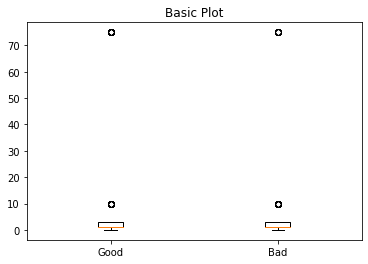

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
data = [good_drugs_mono["Max. conc. A"],bad_drugs_mono["Max. conc. A"]]
labels = ["Good","Bad"]
ax1.boxplot(data, labels =labels)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

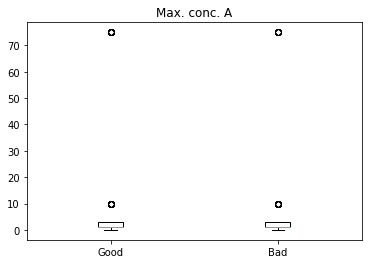

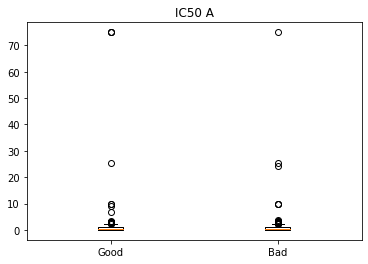

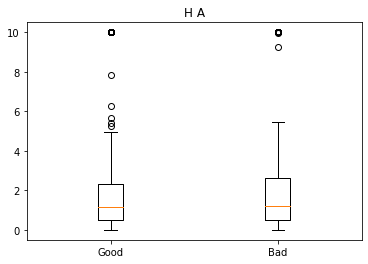

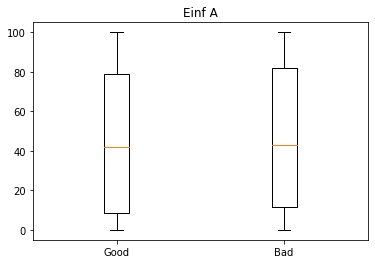

In [ ]:
def boxplot_feature(feature, good_drugs_mono, bad_drugs_mono):
  fig1, ax1 = plt.subplots()
  ax1.set_title(feature)
  data = [good_drugs_mono[feature],bad_drugs_mono[feature]]
  labels = ["Good","Bad"]
  ax1.boxplot(data, labels =labels)

for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  boxplot_feature(feature, good_drugs_mono, bad_drugs_mono)

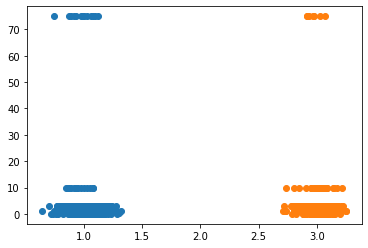

In [ ]:
feature = 'Max. conc. A'
xA, xB = np.random.normal(1, 0.1, len(good_drugs_mono[feature])), np.random.normal(3, 0.1, len(bad_drugs_mono[feature]))

plt.scatter(xA, good_drugs_mono[feature])
plt.scatter(xB, bad_drugs_mono[feature])
plt.show()

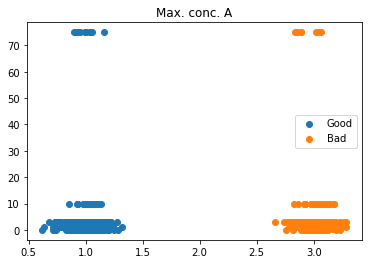

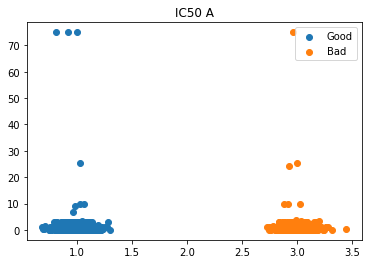

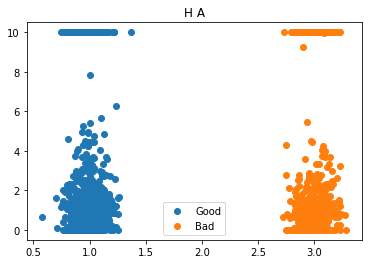

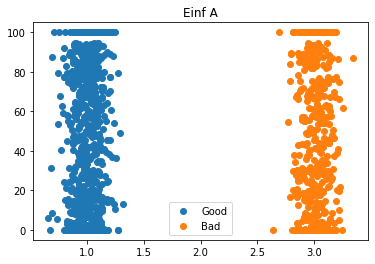

In [ ]:
def scatterplot_feature(feature, good_drugs_mono, bad_drugs_mono):
  xA, xB = np.random.normal(1, 0.1, len(good_drugs_mono[feature])), np.random.normal(3, 0.1, len(bad_drugs_mono[feature]))

  plt.scatter(xA, good_drugs_mono[feature])
  plt.scatter(xB, bad_drugs_mono[feature])
  plt.legend(["Good", "Bad"])
  plt.title(feature)
  plt.show()

for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  scatterplot_feature(feature, good_drugs_mono, bad_drugs_mono)

# Automating thresholds

In [ ]:
"up_thres is the threshold for highly predictable drugs"
"low_thres for the lowly predictable drugs" 
def good_bad_split(drug_pair_pc, up_thres, low_thres):
  good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= up_thres]
  bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= low_thres]
  good_drugs_mono = mono_df[mono_df["Combination ID"].isin(good_drugs["Combination ID"])]
  bad_drugs_mono = mono_df[mono_df["Combination ID"].isin(bad_drugs["Combination ID"])]

  return good_drugs_mono, bad_drugs_mono

good_drugs_mono, bad_drugs_mono = good_bad_split(drug_pair_pc, up_thres = 0.9, low_thres = -0.8)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

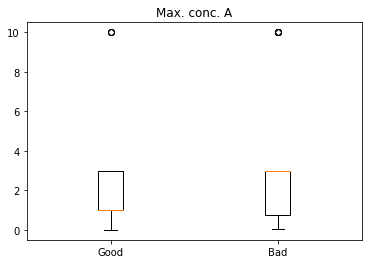

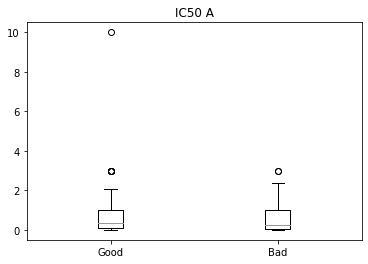

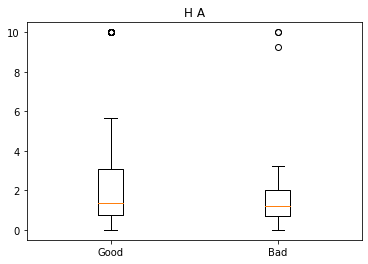

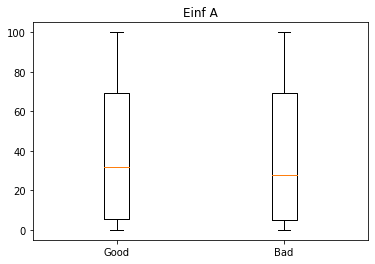

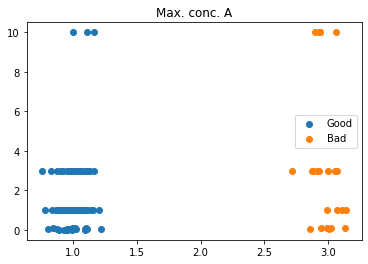

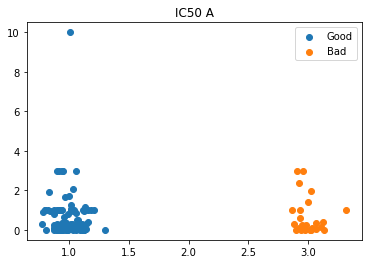

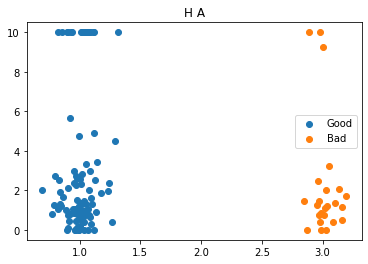

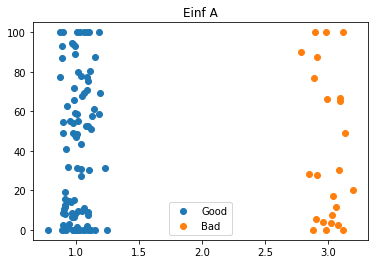

In [ ]:

for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  
  boxplot_feature(feature, good_drugs_mono, bad_drugs_mono)
plt.show() 
for feature in ['Max. conc. A', 'IC50 A', 'H A', 'Einf A']:
  scatterplot_feature(feature, good_drugs_mono, bad_drugs_mono)

We don't see much difference after playing with the threshold, meaning that it is not only a matter of monotherapy features, of each drugs, interaction has to be taken into account.

# Checking abs(diff)
We were unable to see significant differences between the values of monotherapy features of good and bad predicted drugs. We will now try with more complex features such as the absolute value of the difference of each monotherapy value between the drug pair and its mean.

For that matter we have now to create a diff_df and av_df that are not commutative, because we don't want to overcount.

In [ ]:
test_df.columns

Index(['Cell line name', 'Compound A', 'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 'H A', 'Einf A', 'IC50 B', 'H B', 'Einf B',
       'Synergy score', 'QA', 'Combination ID', 'Challenge', 'Dataset'],
      dtype='object')

In [ ]:
diff_df = pd.DataFrame()
diff_df["diff_Max conc"] = np.abs(test_df['Max. conc. A'] -test_df['Max. conc. B'] )
diff_df["diff_IC50"] = np.abs(test_df['IC50 A'] -test_df['IC50 B'] )
diff_df["diff_'H"] = np.abs(test_df['H A'] -test_df['H B'] )
diff_df["diff_Einf"] = np.abs(test_df['Einf A'] -test_df['Einf B'] )
diff_df['Combination ID'] = test_df['Combination ID']

We modify good_bad_split so that we can generalize for every DataFrame of feautres

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

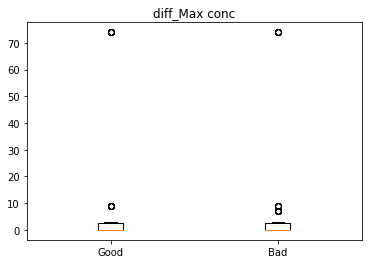

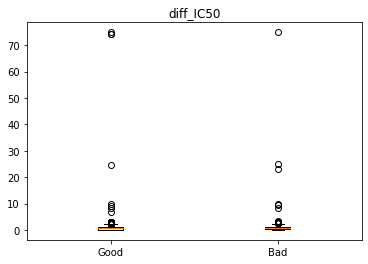

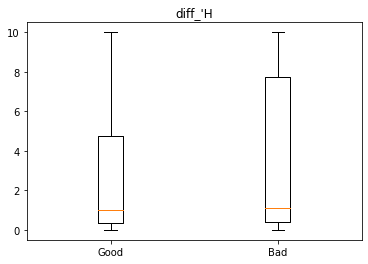

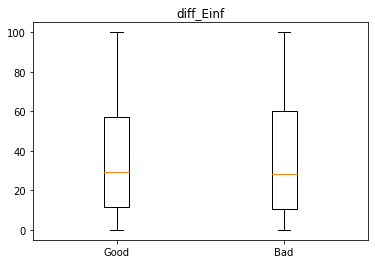

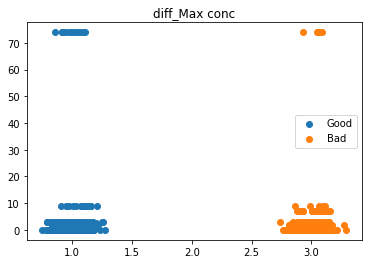

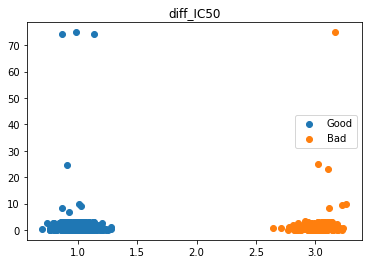

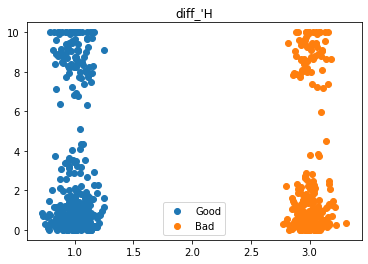

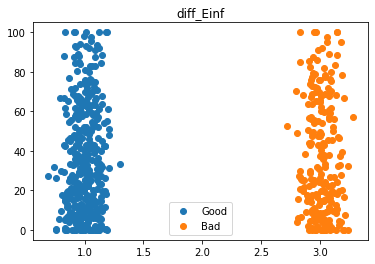

In [ ]:
"up_thres is the threshold for highly predictable drugs"
"low_thres for the lowly predictable drugs" 

def good_bad_split(drug_pair_pc, up_thres, low_thres, feature_df):
  good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= up_thres]
  bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= low_thres]
  good_drugs_feat = feature_df[feature_df["Combination ID"].isin(good_drugs["Combination ID"])]
  bad_drugs_feat = feature_df[feature_df["Combination ID"].isin(bad_drugs["Combination ID"])]

  return good_drugs_feat, bad_drugs_feat

good_drugs_diff, bad_drugs_diff = good_bad_split(drug_pair_pc,
                                                 up_thres = 0.5, 
                                                 low_thres = 0, 
                                                 feature_df = diff_df)

for feature in ["diff_Max conc", "diff_IC50", "diff_'H", "diff_Einf"]:
  
  boxplot_feature(feature, good_drugs_diff, bad_drugs_diff)
plt.show() 
for feature in ["diff_Max conc", "diff_IC50", "diff_'H", "diff_Einf"]:
  scatterplot_feature(feature, good_drugs_diff, bad_drugs_diff)

In [ ]:
test_df.head(10)

,Cell line name,Compound A,Compound B,Max. conc. A,Max. conc. B,IC50 A,H A,Einf A,IC50 B,H B,Einf B,Synergy score,QA,Combination ID,Challenge,Dataset
2790,CAMA-1,AKT,ADAM17,1.0,75.0,0.126186,0.993706,3.688533,1.000000,0.000000,100.000000,-6.972573,1,ADAM17.AKT,ch1,test
2791,HCC1395,AKT,ADAM17,1.0,75.0,0.910569,0.552451,0.000000,10.905410,0.239641,82.740876,-2.669625,1,ADAM17.AKT,ch1,test
2792,Hs-578-T,AKT,ADAM17,1.0,75.0,1.000000,0.258989,17.701706,0.540880,4.851464,73.495692,11.609180,1,ADAM17.AKT,ch1,test
2793,MDA-MB-157,AKT,ADAM17,1.0,75.0,1.000000,0.215696,5.095356,0.010219,0.227937,52.121460,37.900300,1,ADAM17.AKT,ch1,test
2794,MDA-MB-468,AKT,ADAM17,1.0,75.0,0.509420,0.941494,26.827759,7.328496,10.000000,94.799897,29.504740,1,ADAM17.AKT,ch1,test
2795,MFM-223,AKT,ADAM17,1.0,75.0,0.226297,1.952148,17.477798,1.000000,0.000000,100.000000,38.850700,1,ADAM17.AKT,ch1,test
2796,CAL-120,BCL2_BCL2L1,ADAM17,1.0,75.0,0.094510,1.532679,44.192363,1.000000,0.000000,100.000000,-29.224590,1,ADAM17.BCL2_BCL2L1,ch1,test
2797,CAL-51,BCL2_BCL2L1,ADAM17,1.0,75.0,1.000000,0.528524,75.608577,75.000000,0.543599,83.527073,6.826433,1,ADAM17.BCL2_BCL2L1,ch1,test
2798,HCC1187,BCL2_BCL2L1,ADAM17,1.0,75.0,1.000000,0.000000,100.000000,75.000000,10.000000,7.400386,-21.932110,1,ADAM17.BCL2_BCL2L1,ch1,test
2799,HCC1428,BCL2_BCL2L1,ADAM17,1.0,75.0,0.107897,1.263608,9.386941,1.000000,0.000000,100.000000,4.883253,1,ADAM17.BCL2_BCL2L1,ch1,test


In [ ]:
diff_df.head(10)

,diff_Max conc,diff_IC50,diff_'H,diff_Einf,Combination ID
2790,74.0,0.873814,0.993706,96.311467,ADAM17.AKT
2791,74.0,9.994841,0.312809,82.740876,ADAM17.AKT
2792,74.0,0.459120,4.592476,55.793987,ADAM17.AKT
2793,74.0,0.989781,0.012240,47.026104,ADAM17.AKT
2794,74.0,6.819075,9.058506,67.972138,ADAM17.AKT
2795,74.0,0.773703,1.952148,82.522202,ADAM17.AKT
2796,74.0,0.905490,1.532679,55.807637,ADAM17.BCL2_BCL2L1
2797,74.0,74.000000,0.015076,7.918496,ADAM17.BCL2_BCL2L1
2798,74.0,74.000000,10.000000,92.599614,ADAM17.BCL2_BCL2L1
2799,74.0,0.892103,1.263608,90.613059,ADAM17.BCL2_BCL2L1


We don't see anything, again.
We try averages next:

In [ ]:
av_df = pd.DataFrame()
av_df["av_Max conc"] = (test_df['Max. conc. A'] +test_df['Max. conc. B'])/2
av_df["av_IC50"] = (test_df['IC50 A'] +test_df['IC50 B'] )/2
av_df["av_'H"] = (test_df['H A'] +test_df['H B'] )/2
av_df["av_Einf"] = (test_df['Einf A'] +test_df['Einf B'] )/2
av_df['Combination ID'] = test_df['Combination ID']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

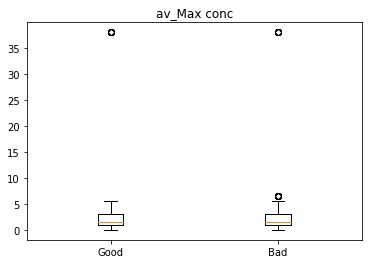

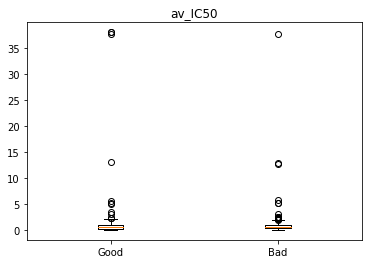

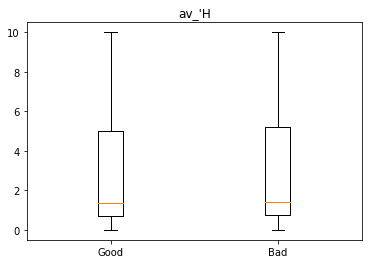

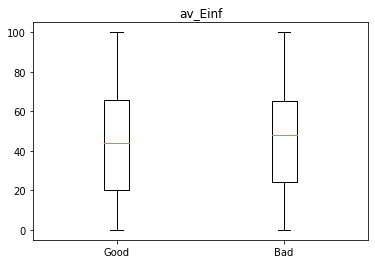

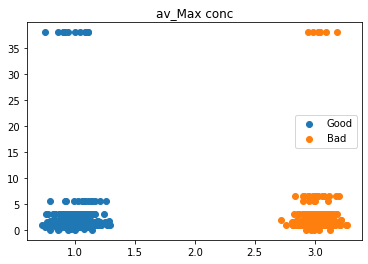

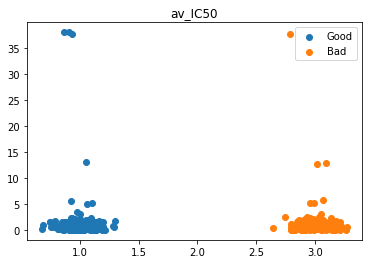

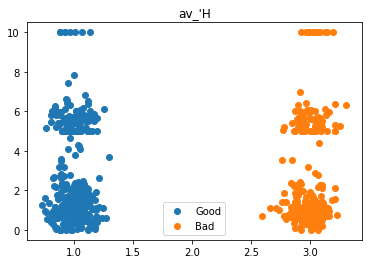

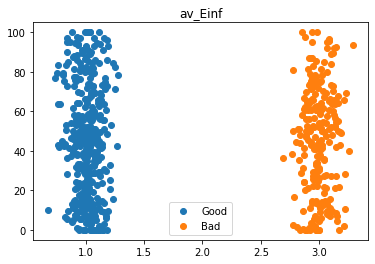

In [ ]:
"up_thres is the threshold for highly predictable drugs"
"low_thres for the lowly predictable drugs" 

def good_bad_split(drug_pair_pc, up_thres, low_thres, feature_df):
  good_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] >= up_thres]
  bad_drugs = drug_pair_pc[drug_pair_pc["Pearson coefficient"] <= low_thres]
  good_drugs_feat = feature_df[feature_df["Combination ID"].isin(good_drugs["Combination ID"])]
  bad_drugs_feat = feature_df[feature_df["Combination ID"].isin(bad_drugs["Combination ID"])]

  return good_drugs_feat, bad_drugs_feat

good_drugs_av, bad_drugs_av = good_bad_split(drug_pair_pc,
                                                 up_thres = 0.5, 
                                                 low_thres = 0, 
                                                 feature_df = av_df)

for feature in ["av_Max conc", "av_IC50", "av_'H", "av_Einf"]:
  
  boxplot_feature(feature, good_drugs_av, bad_drugs_av)
plt.show() 
for feature in ["av_Max conc", "av_IC50", "av_'H", "av_Einf"]:
  scatterplot_feature(feature, good_drugs_av, bad_drugs_av)

# Distribution of WPC and plots

We are going to do some statistics, we can do:

1.   Histogram of WPC with and without low number of cell lines. Check if there is a difference and a suitable threshold for good and bad combinations
2.   Notched Boxplot for WPC depending on n_cl. 

3.   Rank plot where we rank predicted and true synergy score. Then throw a theoretical dotted line y = x and then calculate Spearman rank correlation. Or check if that's what we should check.

4.   We can do some statistics with the predicted and expected synergy using Notched Boxplot, we can check the WPC for cell lines depending of tissue of origin, that's interesting.





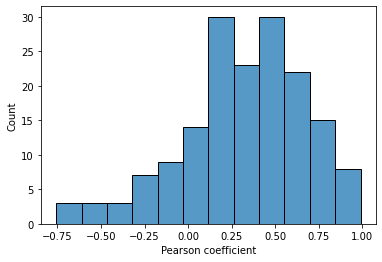

In [15]:
"Without restriction of cell line"
sns.histplot(drug_pair_pc["Pearson coefficient"])

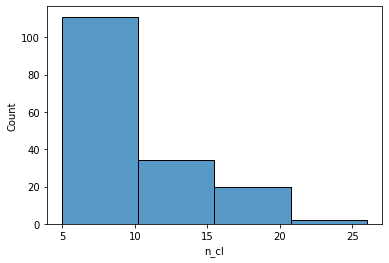

In [16]:
sns.histplot(drug_pair_pc["n_cl"], bins=4)

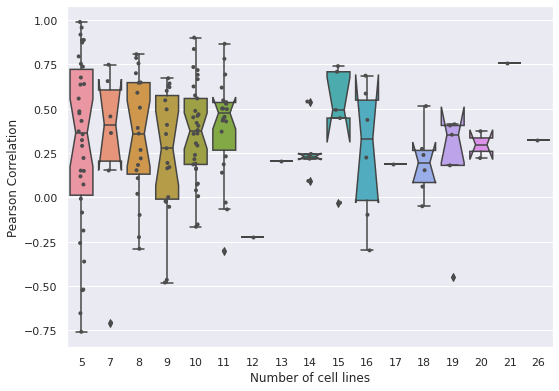

In [76]:
sns.set(style="darkgrid")
notched = sns.boxplot(x=drug_pair_pc["n_cl"], y=drug_pair_pc["Pearson coefficient"], notch=True)
sns.stripplot(x=drug_pair_pc["n_cl"], y=drug_pair_pc["Pearson coefficient"],
              size=4, color=".3", linewidth=0)
notched.set(xlabel = "Number of cell lines", ylabel="Pearson Correlation")
fig = notched.get_figure()
fig.savefig("/content/drive/MyDrive/archivos_tfm/notched_box_wpc_n_cl.pdf")


Now that we have added the LB dataset we see that we have a minimum of 5 cell lines per drug pair. Not bad.

Now we do the rank plot for predicted and expected synergy on the test set. We use the test set that included the LB split.

In [18]:
y_pred = np.loadtxt("/content/drive/MyDrive/archivos_tfm/y_pred_current_best_lb.txt")


We add the observed synergy to a copy of the test_df dataframe

In [36]:
pred_obs = test_df.copy()
pred_obs.columns = ['Cell line name', 'Compound A', 'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 'H A', 'Einf A', 'IC50 B', 'H B', 'Einf B',
       'Experimental synergy score', 'QA', 'Combination ID', 'Challenge', 'Dataset']
pred_obs["Predicted synergy score"] = y_pred

In [37]:
pred_obs.columns

Index(['Cell line name', 'Compound A', 'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 'H A', 'Einf A', 'IC50 B', 'H B', 'Einf B',
       'Experimental synergy score', 'QA', 'Combination ID', 'Challenge',
       'Dataset', 'Predicted synergy score'],
      dtype='object')

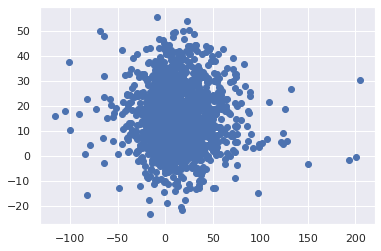

SpearmanrResult(correlation=0.000213529088450742, pvalue=0.9930221303809402)
(-0.012611825149306338, 0.6054585997585131)


In [44]:
pred_obs.sort_values(by = "Experimental synergy score", inplace = True)
plt.plot(pred_obs["Experimental synergy score"], 
                pred_obs['Predicted synergy score'], "bo")
plt.show()
print(stats.spearmanr(pred_obs["Experimental synergy score"], 
                                               pred_obs['Predicted synergy score']))

print(stats.pearsonr(pred_obs["Experimental synergy score"], 
                                               pred_obs['Predicted synergy score']))

Nothing to see, if the results were perfect we would see the points falling in the y=x line. These experiments have a lot of noise and we already knew that this was a bad metric altogether.

We can also see the WPC with the rank

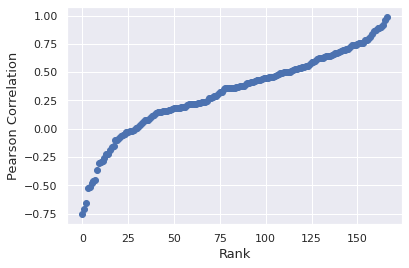

In [43]:
plt.plot(np.arange(len(drug_pair_pc)), 
         drug_pair_pc.sort_values(by = "Pearson coefficient")["Pearson coefficient"], "bo")

plt.xlabel("Rank", fontsize = 13)
plt.ylabel("Pearson Correlation", fontsize = 13)
plt.savefig("/content/drive/MyDrive/archivos_tfm/pearson_correlation_rank.pdf")

In [39]:
drug_pair_pc["Pearson coefficient"]

75     0.989832
131    0.958138
91     0.918519
6      0.901655
11     0.888264
         ...   
161   -0.518792
127   -0.522854
157   -0.652726
66    -0.705411
3     -0.757527
Name: Pearson coefficient, Length: 167, dtype: float64

# GDSC Tissue descriptor and synergy
We are going to compare the predicted and observed synergy depending on things such as gdsc descriptor, pathway, function, etc. 
For that we use the dictionaries obtained for visualizing the embeddings

In [45]:
path = "/content/drive/MyDrive/archivos_tfm/saezr_nc19_DataS1_modificado.xlsx"
sheet_to_df_map = pd.read_excel(path, sheet_name=None)
df_cell_lines = sheet_to_df_map["Cell lines"]

df_drug_port = sheet_to_df_map["Drug portfolio"]

gdsc_dict = dict(zip(df_cell_lines["Cell line name"], df_cell_lines["GDSC tissue descriptor 1"]))
function_dict = dict(zip(df_drug_port["Challenge drug name"], df_drug_port["Function"]))
pathway_dict = dict(zip(df_drug_port["Challenge drug name"], df_drug_port["Pathway"]))

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


We create the new columns that have the additional information of drugs and cell lines

In [53]:
pred_obs["GDSC tissue descriptor 1"] = pred_obs['Cell line name'].map(gdsc_dict)

pred_obs["Compound A Function"] = pred_obs['Compound A'].map(function_dict)
pred_obs["Compound B Function"] = pred_obs['Compound B'].map(function_dict)

pred_obs["Compound A Pathway"] = pred_obs['Compound A'].map(pathway_dict)
pred_obs["Compound B Pathway"] = pred_obs['Compound B'].map(pathway_dict)
pred_obs.to_csv("/content/drive/MyDrive/archivos_tfm/pred_obs_lb.csv")

In [55]:
pred_obs.columns

Index(['Cell line name', 'Compound A', 'Compound B', 'Max. conc. A',
       'Max. conc. B', 'IC50 A', 'H A', 'Einf A', 'IC50 B', 'H B', 'Einf B',
       'Experimental synergy score', 'QA', 'Combination ID', 'Challenge',
       'Dataset', 'Predicted synergy score', 'GDSC tissue descriptor 1',
       'Compound A Function', 'Compound B Function', 'Compound A Pathway',
       'Compound B Pathway'],
      dtype='object')

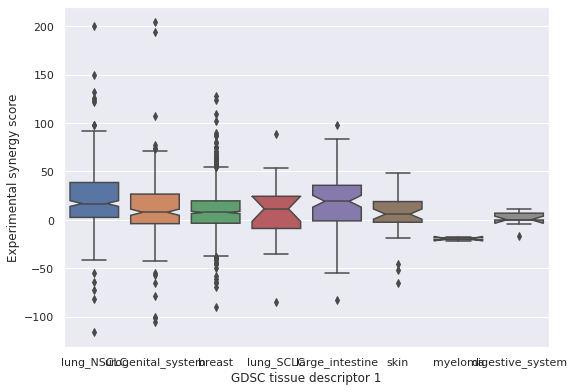

In [64]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

notched = sns.boxplot(x=pred_obs["GDSC tissue descriptor 1"], y=pred_obs['Experimental synergy score'], notch=True)

fig = notched.get_figure()


We cap the experimental synergy to 100 for better visualization

In [62]:
def capped(x):
  if np.abs(x) <= 100:
    return x
  else:
    return np.sign(x)*100
exp_syn_cap = [capped(x) for x in pred_obs['Experimental synergy score']]
pred_obs['Experimental synergy score capped'] = exp_syn_cap

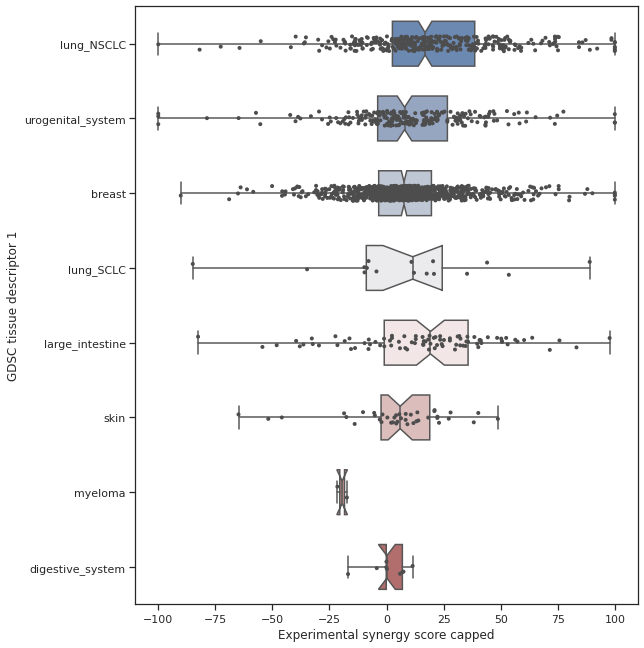

In [84]:
sns.set_theme(style="ticks")
fig1 = plt.figure(figsize=(9, 11))


sns.boxplot(x='Experimental synergy score capped', 
            y="GDSC tissue descriptor 1", data=pred_obs,
            whis=[0, 100], width=.6, palette="vlag", notch=True)
sns.stripplot(x='Experimental synergy score capped', y="GDSC tissue descriptor 1", data=pred_obs,
              size=4, color=".3", linewidth=0)
ax.set(xlabel ='Experimental synergy score' ,ylabel="GDSC tissue descriptor 1")
#sns.despine(trim=True, left=True)
plt.savefig("/content/drive/MyDrive/archivos_tfm/experimental_synergy_tissue.pdf",
            bbox_inches = 'tight')

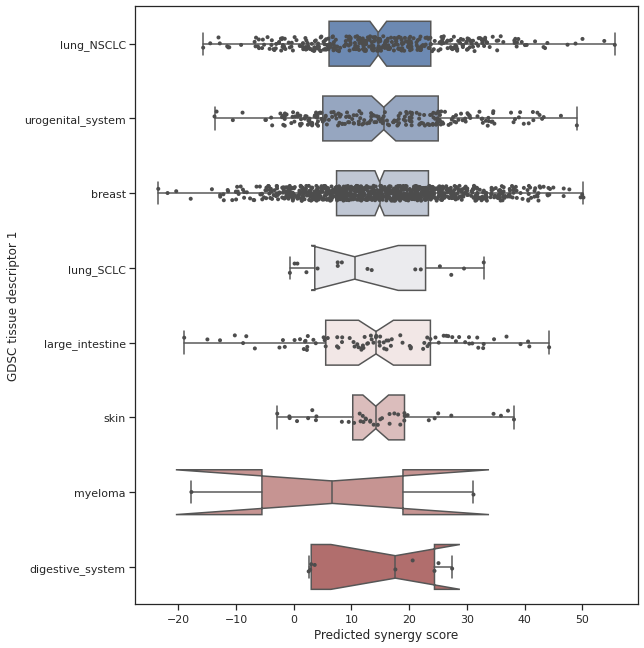

In [85]:
sns.set_theme(style="ticks")
fig2 = plt.figure(figsize=(9, 11))


sns.boxplot(x='Predicted synergy score', y="GDSC tissue descriptor 1", data=pred_obs,
            whis=[0, 100], width=.6, palette="vlag",notch=True)
sns.stripplot(x='Predicted synergy score', y="GDSC tissue descriptor 1", data=pred_obs,
              size=4, color=".3", linewidth=0)
ax.set(xlabel ='Predicted synergy score' ,ylabel="GDSC tissue descriptor 1")
#sns.despine(trim=True, left=True)
plt.savefig("/content/drive/MyDrive/archivos_tfm/predicted_synergy_tissue.pdf",
            bbox_inches = 'tight')

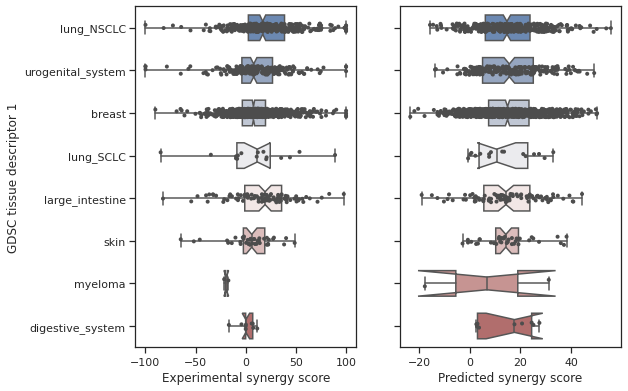

<Figure size 626.4x451.44 with 0 Axes>

In [90]:
plt.subplot(1, 2, 1)
ax1 =sns.boxplot(x='Experimental synergy score capped', 
            y="GDSC tissue descriptor 1", data=pred_obs,
            whis=[0, 100], width=.6, palette="vlag", notch=True)
sns.stripplot(x='Experimental synergy score capped', y="GDSC tissue descriptor 1", data=pred_obs,
              size=4, color=".3", linewidth=0)
ax1.set(xlabel ='Experimental synergy score' ,ylabel="GDSC tissue descriptor 1")

plt.subplot(1, 2, 2)
ax2 = sns.boxplot(x='Predicted synergy score', y="GDSC tissue descriptor 1", data=pred_obs,
            whis=[0, 100], width=.6, palette="vlag",notch=True)
sns.stripplot(x='Predicted synergy score', y="GDSC tissue descriptor 1", data=pred_obs,
              size=4, color=".3", linewidth=0)
ax2.set(xlabel ='Predicted synergy score', ylabel = "")
ax2.set(yticklabels=[])

plt.show()
plt.savefig("/content/drive/MyDrive/archivos_tfm/predicted_observed_synergy_tissue.pdf",
            bbox_inches = 'tight')

We observe that we had an statistically significant difference in synergy for lung_NSCLC and urogenital_system tissues in the observed data that we don't see in the prediction of the model.

# Pathway and function

Now we should do the same by commuting the dataset and analyzing synergy by pathway and function